# Iterative Building of Simulation Model
Here, we give a little overview on how we built this simple example model, to help you get started with building your own simulation models.
We strongly recommend to run this code in your jupyter notebook for this and look at the different objects and their properties.

In [1]:
# We start with the structure of the q-net. It helps to use one line per transition and include all arcs connected to the transition in the same line. This is especially helpful, if you are building your simulation iteratively.
qnet_structure = {("p1", "t1"), ("t1", "p2"), 
                  ("p2", "t2"), ("t2", "p3"), 
                  ("p2", "t3"), ("t3", "p3"), ("p5", "t3"), ("t3", "p6"), ("t3", "p7"),
                  ("p3", "t4"), ("t4", "p4"),
                  ("p7", "t5"), ("t5", "p9"),
                  ("p6", "t6"), ("t6", "p8"),
                  ("p8", "t7"), ("p9", "t7"), ("t7", "p10")
                  }

In [2]:
# lets look at the Quantity net object we we create by just setting the net structure.
from qel_simulation import QuantityNet

qnet = QuantityNet("simple_example") # we need a name for our net
qnet.set_net_structure(qnet_structure)

([t4 (None),
  p4 (DefaultObject),
  p5 (DefaultObject),
  t3 (None),
  t1 (None),
  p2 (DefaultObject),
  t5 (None),
  p9 (DefaultObject),
  p3 (DefaultObject),
  t6 (None),
  p8 (DefaultObject),
  t2 (None),
  t7 (None),
  p10 (DefaultObject),
  p6 (DefaultObject),
  p7 (DefaultObject),
  p1 (DefaultObject)],
 [(t4, p4) (ObjectArc),
  (p5, t3) (ObjectArc),
  (t1, p2) (ObjectArc),
  (t5, p9) (ObjectArc),
  (t3, p3) (ObjectArc),
  (t6, p8) (ObjectArc),
  (p2, t2) (ObjectArc),
  (t7, p10) (ObjectArc),
  (p6, t6) (ObjectArc),
  (p7, t5) (ObjectArc),
  (p9, t7) (ObjectArc),
  (p1, t1) (ObjectArc),
  (t2, p3) (ObjectArc),
  (t3, p6) (ObjectArc),
  (t3, p7) (ObjectArc),
  (p3, t4) (ObjectArc),
  (p2, t3) (ObjectArc),
  (p8, t7) (ObjectArc)])

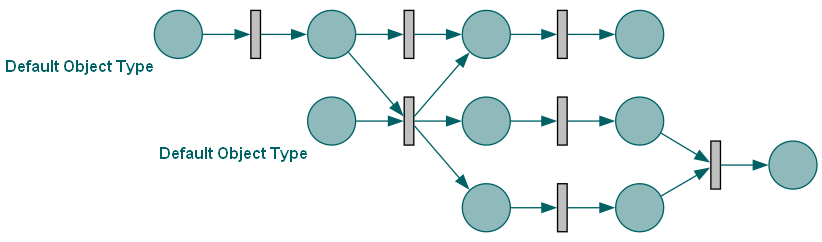

In [3]:
#let's visualise the net to see if it looks like we expect it to look like
from qel_simulation import show_qnet_graph
show_qnet_graph(qnet)

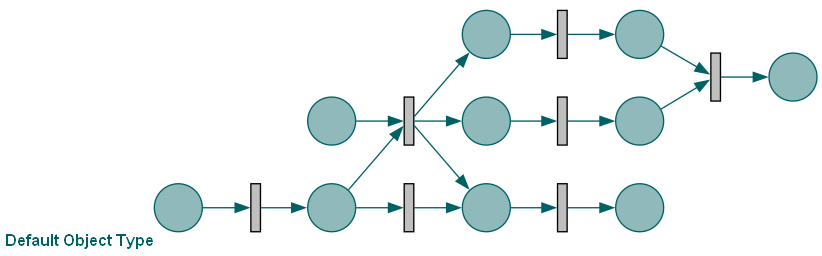

In [4]:
# the tool automatically created the default object type and assigned it to all places. It also identified two default initial places. We can specify which place should be the initial place by setting the initial place attribute.
qnet.redefine_initial_places({"p1"})
show_qnet_graph(qnet)

# this can be reconfigured in the config file using by passing a set of place names to the attribute "initial_places", but we can also do it here.

## Object Types

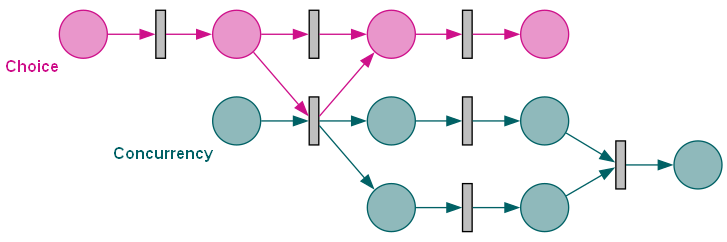

In [5]:
# But we actually want to specify our own object types, so we can set the object types for the places
place_types = {"p1": "Choice",
               "p2": "Choice",
               "p3": "Choice",
               "p4": "Choice",
               "p5": "Concurrency",
               "p6": "Concurrency",
               "p7": "Concurrency",
               "p8": "Concurrency",
               "p9": "Concurrency",
               "p10": "Concurrency",
               }
qnet.set_place_types(place_types)

# ...and now we set the initial places back to include p1 and p5
qnet.set_initial_places({"p1", "p5"})

#...and show the net again
show_qnet_graph(qnet)

# in the config you can set the object types for the places by passing a dictionary to the attribute "place_types".

## Arcs
Now you have a q-net with a structure and object types. Now, let's make some arcs variable.
the tool assumes your net to be well-formed as defined in [1]. 
For demonstration purposes, we set the arcs variable ans specify object quantities here by variable arc.
The corresponding attributes in the configuration file are:
- variable_arcs,
- minimum_variable_arc_object_quantities,
- maximum_variable_arc_object_quantities, and
- specify_variable_arc_object_tokens (for fixed object quantities of not 1, not shown here explictly).

However, we strongly recommend setting the object quantity constraints per transition in the configuration file. Here you pass a dictionary with the transition name as key and a dictionary with the object type or object type name as key and the number of objects as value.
Make sure you set the number of objects for variable object types as zero in the attribute "binding_function_quantities" in the configuration file.
For the minimum and maximum, use the same number as in the binding function quantities if you want to keep the number fixed (either at 1, so for non-variable arcs, or at the number of objects in the binding function) for both minimum and maximum.
If you want no upper bound, set the maximum to 0, if you want no lower bound, set the minimum to 0 (but then the transition can fire without tokens, so usually you want a minimum of 1). 
The corresponding attributes in the configuration file are:
- binding_function_quantities,
- minimum_binding_function_quantities, and
- maximum_binding_function_quantities.

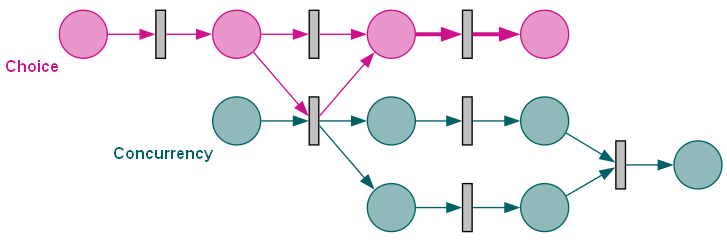

In [6]:
# we can set the arcs to be variable by passing a set of arc tuples.
variable_arcs = {("p3", "t4"), ("t4", "p4")}
qnet.make_arcs_variable(variable_arcs)
show_qnet_graph(qnet)
# As you see, the arcs are now slightly thicker. Now the transition can fire with any number of object tokens - even zero.

In [7]:
# but we want to specify the number of objects that can be taken from and put into the places. We can either specify how many object tokens should be consumed/produced every time by using the method "specify_number_of_object_tokens_variable_arc" and passing a dict with the arc and the integer number of object tokens or use a range. 
# We opt for a range here.
# As the number updates the value in the connected transition, theoretically setting this for one arc per transition and object type is enough. If you set two different values, the last one will be used.
minimum_values = {("p3", "t4"): 1, ("t4", "p4"): 1}
qnet.set_minimum_object_tokens_variable_arc(minimum_values)
maximum_values = {("p3", "t4"): 2, ("t4", "p4"): 2}
qnet.set_maximum_object_tokens_variable_arc(maximum_values)
# we recommend to take a closer look at the transition properties now to see what values were updated.

## Transitions
Now we want to specify the control flow of the transitions and add some activity names.

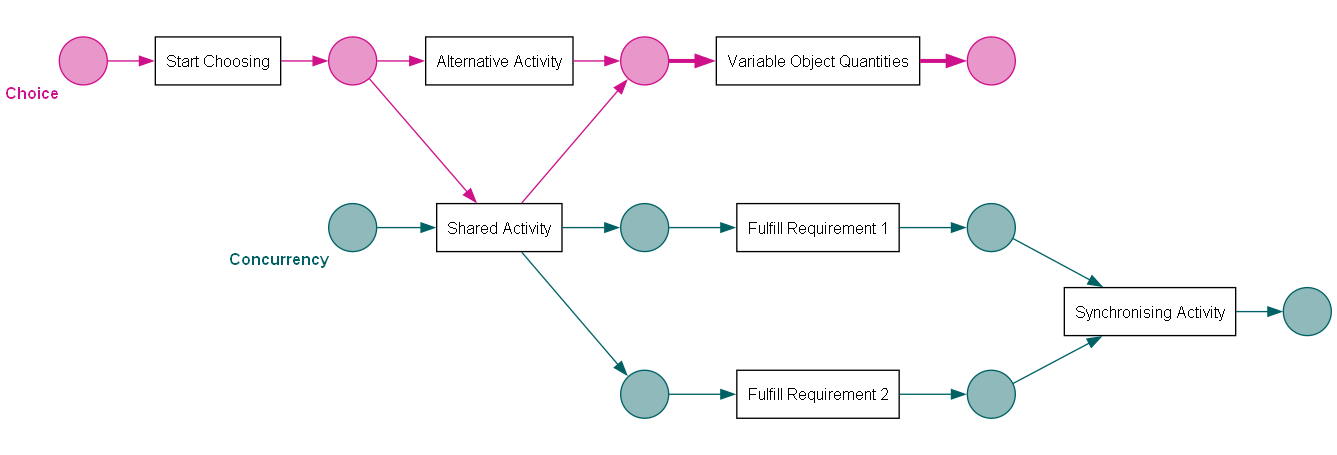

In [8]:
# currently, all transitions are silent. This means they will not be logged. By assigning a lable to each transition, we can change this.
transition_labels = {"t1": "Start Choosing",
                     "t2": "Alternative Activity",
                     "t3": "Shared Activity",
                     "t4": "Variable Object Quantities",
                     "t5": "Fulfill Requirement 1",
                     "t6": "Fulfill Requirement 2",
                     "t7": "Synchronising Activity"}
qnet.set_transition_labels(transition_labels)
show_qnet_graph(qnet)

[1] van der Aalst, W. M. P., & Berti, A. (2020). Discovering Object-centric Petri Nets. Fundamenta Informaticae, 175(1–4), 1–40. https://doi.org/10.3233/FI-2020-1946